In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.genfromtxt('./test.csv', delimiter=',', skip_header=1)
X_train = data[:,0].reshape(-1,1)
y_train= data[:,1].reshape(-1,1)

In [3]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[100.]
Peak to Peak range by column in Normalized X:[3.51410611]


In [4]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 20, number of weight updates: 6001.0


/home/nitzz/anaconda3/envs/LinearRegression/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [28.86423439], b:[51.18960594]


In [6]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[77.62616161 20.82425148 21.8385713  19.80993165]
Target values 
[[79.77515201]
 [23.17727887]
 [25.60926156]
 [17.85738813]]


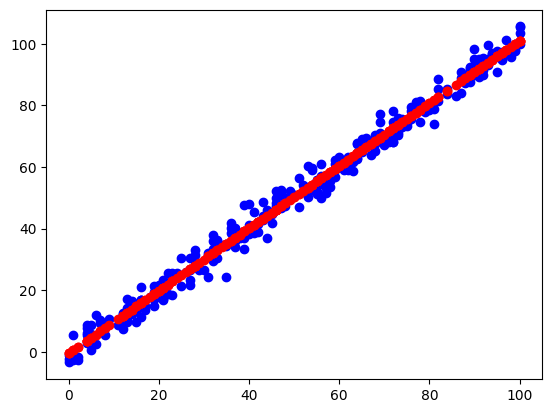

In [7]:
plt.scatter(X_train,y_train, label = 'target', c='b')
    # ax[i].set_xlabel(X_features[i])
plt.scatter(X_train,y_pred,c='r', label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
# fig.suptitle("target versus prediction using z-score normalized model")
plt.show()